## Data Analysis with pandas

Each survey respondent was asked questions about what they typically eat for Thanksgiving, along with some demographic questions, like their gender, income, and location. This dataset will allow us to discover regional and income-based patterns in what Americans eat for Thanksgiving dinner.

Using this Thanksgiving survey data, we can answer quite a few interesting questions, like:

- Do people in Suburban areas eat more Tofurkey than people in Rural areas?
- Where do people go to Black Friday sales most often?
- Is there a correlation between praying on Thanksgiving and income?
- What income groups are most likely to have homemade cranberry sauce?

### Task 1 - Load Data

- Read about the [data set](https://github.com/fivethirtyeight/data/tree/master/thanksgiving-2015)
- Read in the data to pandas
- Check the shape of the dataframe and examine the different columns
- Check the summary statistics of the dataframe

In [216]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('thanksgiving.csv',encoding='latin1')
print(df.shape)

df.head()

(1058, 65)


,RespondentID,Do you celebrate Thanksgiving?,What is typically the main dish at your Thanksgiving dinner?,What is typically the main dish at your Thanksgiving dinner? - Other (please specify),How is the main dish typically cooked?,How is the main dish typically cooked? - Other (please specify),What kind of stuffing/dressing do you typically have?,What kind of stuffing/dressing do you typically have? - Other (please specify),What type of cranberry saucedo you typically have?,What type of cranberry saucedo you typically have? - Other (please specify),...,Have you ever tried to meet up with hometown friends on Thanksgiving night?,"Have you ever attended a ""Friendsgiving?""",Will you shop any Black Friday sales on Thanksgiving Day?,Do you work in retail?,Will you employer make you work on Black Friday?,How would you describe where you live?,Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,4337954960,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,None,NaN,...,Yes,No,No,No,NaN,Suburban,18 - 29,Male,"$75,000 to $99,999",Middle Atlantic
1,4337951949,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Other (please specify),Homemade cranberry gelatin ring,...,No,No,Yes,No,NaN,Rural,18 - 29,Female,"$50,000 to $74,999",East South Central
2,4337935621,Yes,Turkey,NaN,Roasted,NaN,Rice-based,NaN,Homemade,NaN,...,Yes,Yes,Yes,No,NaN,Suburban,18 - 29,Male,"$0 to $9,999",Mountain
3,4337933040,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Homemade,NaN,...,Yes,No,No,No,NaN,Urban,30 - 44,Male,"$200,000 and up",Pacific
4,4337931983,Yes,Tofurkey,NaN,Baked,NaN,Bread-based,NaN,Canned,NaN,...,Yes,No,No,No,NaN,Urban,30 - 44,Male,"$100,000 to $124,999",Pacific


In [217]:
print(df.columns)
df.describe()


Index(['RespondentID', 'Do you celebrate Thanksgiving?',
       'What is typically the main dish at your Thanksgiving dinner?',
       'What is typically the main dish at your Thanksgiving dinner? - Other (please specify)',
       'How is the main dish typically cooked?',
       'How is the main dish typically cooked? - Other (please specify)',
       'What kind of stuffing/dressing do you typically have?',
       'What kind of stuffing/dressing do you typically have? - Other (please specify)',
       'What type of cranberry saucedo you typically have?',
       'What type of cranberry saucedo you typically have? - Other (please specify)',
       'Do you typically have gravy?',
       'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Brussel sprouts',
       'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Carrots',
       'Which of these side dishes aretypically served

,RespondentID
count,1.058000e+03
mean,4.336731e+09
std,4.937834e+05
min,4.335895e+09
25%,4.336339e+09
50%,4.336797e+09
75%,4.337012e+09
max,4.337955e+09


In [218]:
df['Do you celebrate Thanksgiving?'].value_counts()

Yes    980
No      78
Name: Do you celebrate Thanksgiving?, dtype: int64

### Task 2 - Initial Data Analysis

- Create a new dataframe that only includes people that celebrate Thanksgiving
- Find out what the most popular main dish is.
- Do people who eat Tofurkey also have gravy as a side dish (calculate proportions)?
- What is the most popular pie?
- How many pies are eaten other than Apple, Pecan and Pumpkin?
- Look at the age distribution.
- Write a function that approximates each respondent's age given the ranges and apply it to all cells (remember type conversion).
- Examine the summary statistics of the age column now.
- Look at the income distribution.
- Write a function that approximates each respondent's income given the ranges and apply it to all cells (remember type conversion).
- Examine the summary statistics of the income column now.
- Look at the distance traveled for lower income (< 50,000) vs. higher income (>150,000) respondents.
- Use the pivot_table function to examine what ages and incomes are more likely to "attend a Friendsgiving" or "meetup with hometown friends.


In [219]:
df = df[df['Do you celebrate Thanksgiving?']=='Yes']
df.shape

(980, 65)

In [220]:
# Find out what the most popular main dish is.
main_dish_col = 'What is typically the main dish at your Thanksgiving dinner?'
main_dish = pd.crosstab(index=df[main_dish_col],columns='count')
print('Most preferable dish is', main_dish['count'].idxmax(),' :',main_dish.loc[main_dish['count'].idxmax(),'count'])
main_dish
# Do people who eat Tofurkey also have gravy as a side dish (calculate proportions)?
gravy_col = 'Do you typically have gravy?'
print('Tofurkey&gravy/Tofurkey=',len( df[ (df[main_dish_col]=='Tofurkey') & (df[gravy_col]=='Yes')].index)/len(df[df[main_dish_col]=='Tofurkey'].index) )
# What is the most popular pie?
pie_cols = ['Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Apple',
       'Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Buttermilk',
       'Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Cherry',
       'Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Chocolate',
       'Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Coconut cream',
       'Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Key lime',
       'Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Peach',
       'Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pecan',
       'Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pumpkin',
       'Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Sweet Potato'
       ]
pies = pd.Series(df[pie_cols].count().values)
pies.index = df[pie_cols].mode().iloc[0].values
print(pies)
print('Most popular pie is ' ,pies.idxmax(),' Total: ',pies.max())

# How many pies are eaten other than Apple, Pecan and Pumpkin?
exception_pies = ["Apple", "Pecan","Pumpkin"]
print('Total pies rather than Apple, Pecan and Pumpkin: ',pies[~pies.index.isin(exception_pies)].sum())


Most preferable dish is Turkey  : 859
Tofurkey&gravy/Tofurkey= 0.6
Apple            514
Buttermilk        35
Cherry           113
Chocolate        133
Coconut cream     36
Key lime          39
Peach             34
Pecan            342
Pumpkin          729
Sweet Potato     152
dtype: int64
Most popular pie is  Pumpkin  Total:  729
Total pies rather than Apple, Pecan and Pumpkin:  542


count       753.000000
mean      75029.380478
std       47365.158239
min        4999.500000
25%       37499.500000
50%       62499.500000
75%      112499.500000
max      187499.500000
Name: approx_income, dtype: float64

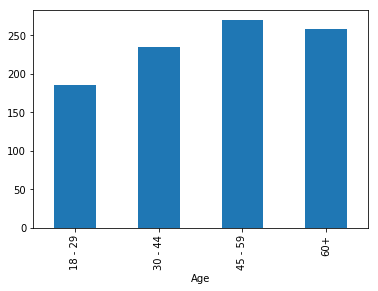

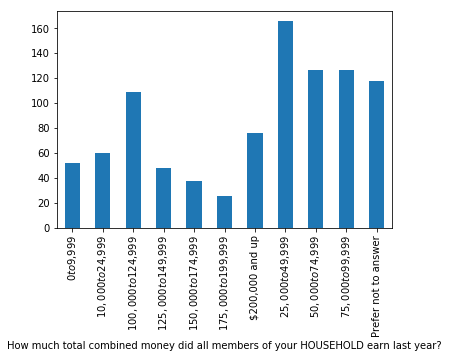

In [221]:
# Look at the age distribution.
ages = pd.crosstab(index=df['Age'], columns='count')
ages.plot(kind='bar',legend=False)
# Write a function that approximates each respondent's age given the ranges  and apply it to all cells (remember type conversion).
def get_age(age_range):
    if(type(age_range)==str and '-' in age_range):
        a= [int(x.strip()) for x in age_range.replace(" ", "").split('-')]
#         print(a)
        return (a[0]+a[1])/2
    elif(type(age_range)==str and '+' in age_range):
        return (80+60)/2
    else:
        return 0
df['approx_age']=df['Age'].apply(get_age)
    
# Examine the summary statistics of the age column now.
df['approx_age'].describe()
# Look at the income distribution.
income_col = 'How much total combined money did all members of your HOUSEHOLD earn last year?'
incomes = pd.crosstab(index=df[income_col], columns='count')
incomes.plot(kind='bar',legend=False)
# Write a function that approximates each respondent's income 
# given the ranges and apply it to all cells (remember type conversion).
import re
def get_income(income_range):
    if(type(income_range)==str and re.match('\$[0-9,]+ to \$[0-9,]+',income_range)):
        i = [int(x.strip()) for x in income_range.replace(",","").replace("$","").replace(" ","").split('to')]
#         print(i)
        return (i[0] + i[1])/2
    else:
        return 0

df['approx_income'] = df[income_col].apply(get_income)
# incomes
# Examine the summary statistics of the income column now.
df[df['approx_income']>0]['approx_income'].describe()


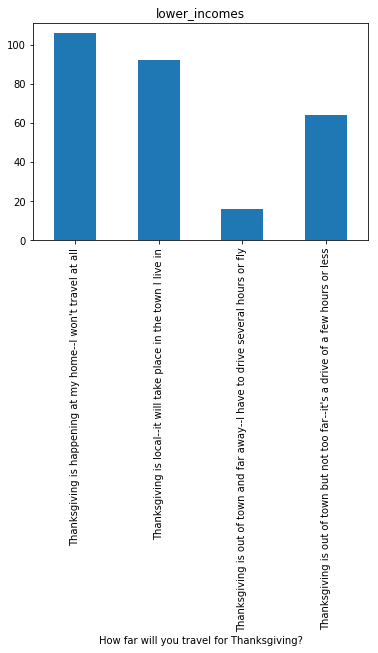

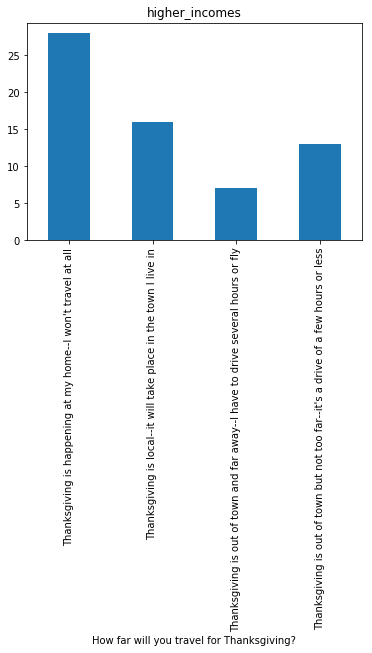

In [222]:
# Look at the distance traveled for lower income (< 50,000) vs. higher income (>150,000) respondents.
travel_col =  'How far will you travel for Thanksgiving?'
lower_incomes = df[(df['approx_income']>0)&(df['approx_income']<50000)]
pd.crosstab(index=lower_incomes[travel_col], columns='count').plot(kind='bar',legend=False,title='lower_incomes')

higher_incomes =df[ df['approx_income']>150000 ]
pd.crosstab(index=higher_incomes[travel_col], columns='count').plot(kind='bar',legend=False,title='higher_incomes')





In [223]:
# Use the pivot_table function to examine what ages and incomes are more likely to 
# "attend a Friendsgiving" or "meetup with hometown friends.
# Examine the summary statistics of the age column now.
friendsgiving_col = 'Have you ever attended a "Friendsgiving?"'
ht_friends_col = 'Have you ever tried to meet up with hometown friends on Thanksgiving night?'
pd.pivot_table(df, index='Age', columns=[friendsgiving_col,ht_friends_col], values='approx_age')


Have you ever attended a "Friendsgiving?"                                      No  \
Have you ever tried to meet up with hometown friends on Thanksgiving night?    No   
Age                                                                                 
18 - 29                                                                      23.5   
30 - 44                                                                      37.0   
45 - 59                                                                      52.0   
60+                                                                          70.0   

Have you ever attended a "Friendsgiving?"                                          \
Have you ever tried to meet up with hometown friends on Thanksgiving night?   Yes   
Age                                                                                 
18 - 29                                                                      23.5   
30 - 44                                                                      37.0   
45 - 59                                                                      52.0   
60+                                                                          70.0   

Have you ever attended a "Friendsgiving?"                                     Yes  \
Have you ever tried to meet up with hometown friends on Thanksgiving night?    No   
Age                                                                                 
18 - 29                                                                      23.5   
30 - 44                                                                      37.0   
45 - 59                                                                      52.0   
60+                                                                          70.0   

Have you ever attended a "Friendsgiving?"                                          
Have you ever tried to meet up with hometown friends on Thanksgiving night?   Yes  
Age                                                                                
18 - 29                                                                      23.5  
30 - 44                                                                      37.0  
45 - 59                                                                      52.0  
60+                                                                          70.0

### Task 3 - Visualization

matplotlib
- Use groupby to examine the breakdown of income by type of cranberry sauce
- Use agg to compute the mean and plot the results in a bar chart
- Use agg to find the average income of people who eat "Homemade" cranberry sauce and "Tofurkey"
- Choose an appropriate plot or chart to visualize the results

,approx_income
What type of cranberry saucedo you typically have?,
Canned,59526.489044
Homemade,56594.327243
None,54708.520548
Other (please specify),63699.580000


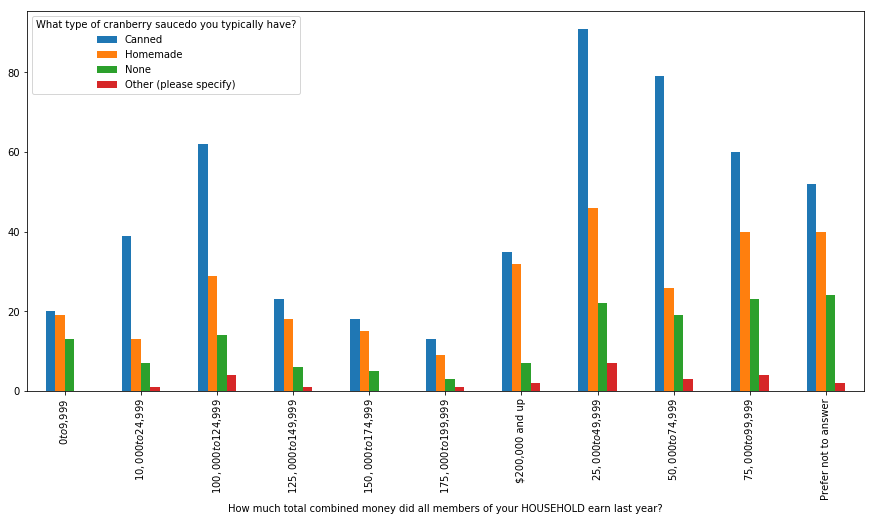

In [244]:
# Use groupby to examine the breakdown of income by type of cranberry sauce
cranberry_col = 'What type of cranberry saucedo you typically have?'
fig, ax = plt.subplots(figsize=(15,7))
df.groupby([income_col,cranberry_col]).size().unstack().plot(kind='bar',ax=ax)



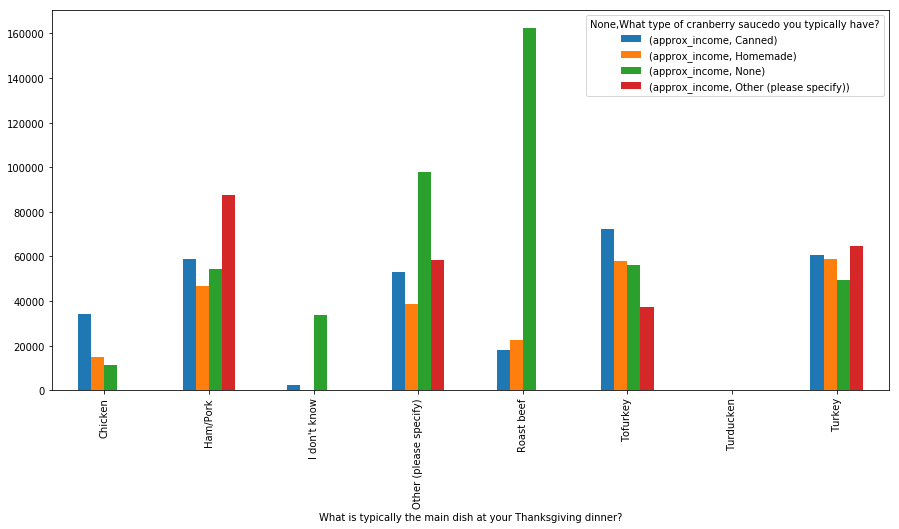

In [251]:
# Use agg to compute the mean and plot the results in a bar chart
df.groupby([cranberry_col]).agg({'approx_income':'mean'})
# Use agg to find the average income of people who eat "Homemade" cranberry sauce and "Tofurkey"
df.groupby([cranberry_col,main_dish_col]).agg({'approx_income':'mean'})
# Choose an appropriate plot or chart to visualize the results
fig, ax2 = plt.subplots(figsize=(15,7))
df.groupby([main_dish_col,cranberry_col]).agg({'approx_income':'mean'}).unstack().plot(kind='bar',ax=ax2)
